# Analysis

In [1]:
import os
import gc
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
%matplotlib notebook

In [2]:
gc.collect()

11

## Set: "Alumnos"

Read dataframe

In [3]:
df_a = pd.read_csv('alumnos.csv')

Select only those columns having relevant info

In [4]:
aux_col = [x for x in df_a.columns if 'v' in x]

Matrix scatter

In [5]:
if False:
    sns.set(style='ticks')
    s_matrix = sns.pairplot(df_a[aux_col + ['curso']], hue='curso')
    s_matrix.savefig('alumnos.pdf', dpi=500, format='pdf')

### Define macro-variables

Confianza (m1) / Adaptacion (m2) / Compromiso (m3) / Conciencia social (m4)

Note some variables appears in more than in one macro-variable

In [6]:
m1 = [13, 14, 15, 16, 17, 18, 20, 21, 22, 26, 27, 28, 29]
m2 = [1, 10, 11, 22, 23, 25, 26]
m3 = [2, 3, 4, 5, 6, 11, 12, 13, 18, 19, 23, 24, 25, 26, 30]
m4 = [1, 7, 8, 9, 11, 15, 19, 22, 30]
#
m1 = ['v{0:02}'.format(n) for n in m1]
m2 = ['v{0:02}'.format(n) for n in m2]
m3 = ['v{0:02}'.format(n) for n in m3]
m4 = ['v{0:02}'.format(n) for n in m4]

In [7]:
equiv = {
    'm1': 'Confianza',
    'm2': 'Adaptacion',
    'm3': 'Compromiso',
    'm4': 'Conciencia Social',
}

Division per year

In [8]:
y1 = df_a.loc[df_a['curso'] == 1]
y4 = df_a.loc[df_a['curso'] == 4]
y5 = df_a.loc[df_a['curso'] == 5]

Define some lists to save correlation tests

In [9]:
aux_stat, aux_pval, aux_yr, aux_mvar, aux_test = [], [], [], [], []

Statistical tests for the macro-variables:

# Tests for all variables at once inside each macro-variable

## ANOVA

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Doing the analysis for all the years

In [10]:
m1_anova = stats.f_oneway(*[df_a[c].values for c in m1])
m2_anova = stats.f_oneway(*[df_a[c].values for c in m2])
m3_anova = stats.f_oneway(*[df_a[c].values for c in m3])
m4_anova = stats.f_oneway(*[df_a[c].values for c in m4])

In [11]:
aux_stat.append(m1_anova[0])
aux_pval.append(m1_anova[1])
aux_yr.append(-1)
aux_mvar.append(equiv['m1'])
aux_test.append('anova')

In [12]:
aux_stat.append(m2_anova[0])
aux_pval.append(m2_anova[1])
aux_yr.append(-1)
aux_mvar.append(equiv['m2'])
aux_test.append('anova')

In [13]:
aux_stat.append(m3_anova[0])
aux_pval.append(m3_anova[1])
aux_yr.append(-1)
aux_mvar.append(equiv['m3'])
aux_test.append('anova')

In [14]:
aux_stat.append(m4_anova[0])
aux_pval.append(m4_anova[1])
aux_yr.append(-1)
aux_mvar.append(equiv['m4'])
aux_test.append('anova')

For all the above ANOVA tests, the p-value allow us to reject the null hypothesis of the mean being the same for all the samples

If we now do it year by year, lets see if that stands

In [15]:
m1_y1_anova = stats.f_oneway(*[y1[c].values for c in m1])
m2_y1_anova = stats.f_oneway(*[y1[c].values for c in m2])
m3_y1_anova = stats.f_oneway(*[y1[c].values for c in m3])
m4_y1_anova = stats.f_oneway(*[y1[c].values for c in m4])

In [16]:
m1_y1_anova, m2_y1_anova, m3_y1_anova, m4_y1_anova

(F_onewayResult(statistic=9.48273753266248, pvalue=1.8920624636844538e-17),
 F_onewayResult(statistic=9.997065855248856, pvalue=2.1634959442988116e-10),
 F_onewayResult(statistic=20.90941936006699, pvalue=6.438960742500789e-47),
 F_onewayResult(statistic=44.61676454026225, pvalue=4.8235070628214935e-56))

In [17]:
aux_stat.append(m1_y1_anova[0])
aux_pval.append(m1_y1_anova[1])
aux_yr.append(1)
aux_mvar.append(equiv['m1'])
aux_test.append('anova')
#
aux_stat.append(m2_y1_anova[0])
aux_pval.append(m2_y1_anova[1])
aux_yr.append(1)
aux_mvar.append(equiv['m2'])
aux_test.append('anova')
#
aux_stat.append(m3_y1_anova[0])
aux_pval.append(m3_y1_anova[1])
aux_yr.append(1)
aux_mvar.append(equiv['m3'])
aux_test.append('anova')
#
aux_stat.append(m4_y1_anova[0])
aux_pval.append(m4_y1_anova[1])
aux_yr.append(1)
aux_mvar.append(equiv['m4'])
aux_test.append('anova')

In [18]:
m1_y4_anova = stats.f_oneway(*[y4[c].values for c in m1])
m2_y4_anova = stats.f_oneway(*[y4[c].values for c in m2])
m3_y4_anova = stats.f_oneway(*[y4[c].values for c in m3])
m4_y4_anova = stats.f_oneway(*[y4[c].values for c in m4])

In [19]:
m1_y4_anova, m2_y4_anova, m3_y4_anova, m4_y4_anova

(F_onewayResult(statistic=1.6418373680943519, pvalue=0.08766824136104183),
 F_onewayResult(statistic=2.4441205053449946, pvalue=0.03335826510182817),
 F_onewayResult(statistic=5.156325156325158, pvalue=7.236877140677416e-08),
 F_onewayResult(statistic=8.923501577287071, pvalue=6.2811902294764235e-09))

In [20]:
aux_stat.append(m1_y4_anova[0])
aux_pval.append(m1_y4_anova[1])
aux_yr.append(4)
aux_mvar.append(equiv['m1'])
aux_test.append('anova')
#
aux_stat.append(m2_y4_anova[0])
aux_pval.append(m2_y4_anova[1])
aux_yr.append(4)
aux_mvar.append(equiv['m2'])
aux_test.append('anova')
#
aux_stat.append(m3_y4_anova[0])
aux_pval.append(m3_y4_anova[1])
aux_yr.append(4)
aux_mvar.append(equiv['m3'])
aux_test.append('anova')
#
aux_stat.append(m4_y4_anova[0])
aux_pval.append(m4_y4_anova[1])
aux_yr.append(4)
aux_mvar.append(equiv['m4'])
aux_test.append('anova')

In [21]:
m1_y5_anova = stats.f_oneway(*[y5[c].values for c in m1])
m2_y5_anova = stats.f_oneway(*[y5[c].values for c in m2])
m3_y5_anova = stats.f_oneway(*[y5[c].values for c in m3])
m4_y5_anova = stats.f_oneway(*[y5[c].values for c in m4])

In [22]:
m1_y5_anova, m2_y5_anova, m3_y5_anova, m4_y5_anova

(F_onewayResult(statistic=0.6461251167133522, pvalue=0.7981476187084677),
 F_onewayResult(statistic=1.098591549295775, pvalue=0.3747586873699571),
 F_onewayResult(statistic=5.352573352573352, pvalue=7.878059524620763e-08),
 F_onewayResult(statistic=9.068783068783068, pvalue=1.589969802783145e-08))

In [23]:
aux_stat.append(m1_y5_anova[0])
aux_pval.append(m1_y5_anova[1])
aux_yr.append(5)
aux_mvar.append(equiv['m1'])
aux_test.append('anova')
#
aux_stat.append(m2_y5_anova[0])
aux_pval.append(m2_y5_anova[1])
aux_yr.append(5)
aux_mvar.append(equiv['m2'])
aux_test.append('anova')
#
aux_stat.append(m3_y5_anova[0])
aux_pval.append(m3_y5_anova[1])
aux_yr.append(5)
aux_mvar.append(equiv['m3'])
aux_test.append('anova')
#
aux_stat.append(m4_y5_anova[0])
aux_pval.append(m4_y5_anova[1])
aux_yr.append(5)
aux_mvar.append(equiv['m4'])
aux_test.append('anova')

The ANOVA tests gave the following result: only for year=5 the m1 and m2 groups showed a strong agreement in their distribution. For year=4 the m1 group has p-value=0.088 and for m2 a p-value=0.033

For interpreting [p-value](https://www.statsdirect.com/help/basics/p_values.htm)

## Kruskal-Wallis 
The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post-hoc comparisons between groups are required to determine which groups are different.

Needs at least 5 measurements

All years together

In [24]:
m1_kruskal = stats.kruskal(*[df_a[c].values for c in m1])
m2_kruskal = stats.kruskal(*[df_a[c].values for c in m2])
m3_kruskal = stats.kruskal(*[df_a[c].values for c in m3])
m4_kruskal = stats.kruskal(*[df_a[c].values for c in m4])

In [25]:
m1_kruskal, m2_kruskal, m3_kruskal, m4_kruskal

(KruskalResult(statistic=110.73303519172596, pvalue=4.285157415484025e-18),
 KruskalResult(statistic=47.96554665944807, pvalue=1.2004952738838648e-08),
 KruskalResult(statistic=215.02674922301935, pvalue=4.6096578034756256e-38),
 KruskalResult(statistic=265.8552942223427, pvalue=7.460858917301393e-53))

In [26]:
aux_stat.append(m1_kruskal[0])
aux_pval.append(m1_kruskal[1])
aux_yr.append(-1)
aux_mvar.append(equiv['m1'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m2_kruskal[0])
aux_pval.append(m2_kruskal[1])
aux_yr.append(-1)
aux_mvar.append(equiv['m2'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m3_kruskal[0])
aux_pval.append(m3_kruskal[1])
aux_yr.append(-1)
aux_mvar.append(equiv['m3'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m4_kruskal[0])
aux_pval.append(m4_kruskal[1])
aux_yr.append(-1)
aux_mvar.append(equiv['m4'])
aux_test.append('kruskal-wallis')

In [27]:
m1_y1_kruskal = stats.kruskal(*[y1[c].values for c in m1])
m2_y1_kruskal = stats.kruskal(*[y1[c].values for c in m2])
m3_y1_kruskal = stats.kruskal(*[y1[c].values for c in m3])
m4_y1_kruskal = stats.kruskal(*[y1[c].values for c in m4])

In [28]:
m1_y1_kruskal, m2_y1_kruskal, m3_y1_kruskal, m4_y1_kruskal

(KruskalResult(statistic=97.87660875582098, pvalue=1.449315081570707e-15),
 KruskalResult(statistic=41.57069043603203, pvalue=2.234870042092047e-07),
 KruskalResult(statistic=158.6596406844267, pvalue=1.31967895404267e-26),
 KruskalResult(statistic=198.61824595484154, pvalue=1.249097287835106e-38))

In [29]:
aux_stat.append(m1_y1_kruskal[0])
aux_pval.append(m1_y1_kruskal[1])
aux_yr.append(1)
aux_mvar.append(equiv['m1'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m2_y1_kruskal[0])
aux_pval.append(m2_y1_kruskal[1])
aux_yr.append(1)
aux_mvar.append(equiv['m2'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m3_y1_kruskal[0])
aux_pval.append(m3_y1_kruskal[1])
aux_yr.append(1)
aux_mvar.append(equiv['m3'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m4_y1_kruskal[0])
aux_pval.append(m4_y1_kruskal[1])
aux_yr.append(1)
aux_mvar.append(equiv['m4'])
aux_test.append('kruskal-wallis')

In [30]:
m1_y4_kruskal = stats.kruskal(*[y4[c].values for c in m1])
m2_y4_kruskal = stats.kruskal(*[y4[c].values for c in m2])
m3_y4_kruskal = stats.kruskal(*[y4[c].values for c in m3])
m4_y4_kruskal = stats.kruskal(*[y4[c].values for c in m4])

In [31]:
m1_y4_kruskal, m2_y4_kruskal, m3_y4_kruskal, m4_y4_kruskal

(KruskalResult(statistic=19.911659255307004, pvalue=0.06877563501761486),
 KruskalResult(statistic=12.387031690359201, pvalue=0.05387103232203867),
 KruskalResult(statistic=52.77164973975627, pvalue=2.0803798460973948e-06),
 KruskalResult(statistic=40.20061797334527, pvalue=2.9394785372092874e-06))

In [32]:
aux_stat.append(m1_y4_kruskal[0])
aux_pval.append(m1_y4_kruskal[1])
aux_yr.append(4)
aux_mvar.append(equiv['m1'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m2_y4_kruskal[0])
aux_pval.append(m2_y4_kruskal[1])
aux_yr.append(4)
aux_mvar.append(equiv['m2'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m3_y4_kruskal[0])
aux_pval.append(m3_y4_kruskal[1])
aux_yr.append(4)
aux_mvar.append(equiv['m3'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m4_y4_kruskal[0])
aux_pval.append(m4_y4_kruskal[1])
aux_yr.append(4)
aux_mvar.append(equiv['m4'])
aux_test.append('kruskal-wallis')

In [33]:
m1_y5_kruskal = stats.kruskal(*[y5[c].values for c in m1])
m2_y5_kruskal = stats.kruskal(*[y5[c].values for c in m2])
m3_y5_kruskal = stats.kruskal(*[y5[c].values for c in m3])
m4_y5_kruskal = stats.kruskal(*[y5[c].values for c in m4])

In [34]:
m1_y5_kruskal, m2_y5_kruskal, m3_y5_kruskal, m4_y5_kruskal

(KruskalResult(statistic=7.382851638908156, pvalue=0.831311430286555),
 KruskalResult(statistic=4.854319646461605, pvalue=0.5626290984113294),
 KruskalResult(statistic=34.44947116745623, pvalue=0.0017721891775393424),
 KruskalResult(statistic=34.05309192775126, pvalue=3.973646831266904e-05))

In [35]:
aux_stat.append(m1_y5_kruskal[0])
aux_pval.append(m1_y5_kruskal[1])
aux_yr.append(5)
aux_mvar.append(equiv['m1'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m2_y5_kruskal[0])
aux_pval.append(m2_y5_kruskal[1])
aux_yr.append(5)
aux_mvar.append(equiv['m2'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m3_y5_kruskal[0])
aux_pval.append(m3_y5_kruskal[1])
aux_yr.append(5)
aux_mvar.append(equiv['m3'])
aux_test.append('kruskal-wallis')
#
aux_stat.append(m4_y5_kruskal[0])
aux_pval.append(m4_y5_kruskal[1])
aux_yr.append(5)
aux_mvar.append(equiv['m4'])
aux_test.append('kruskal-wallis')

For the Kruskal-Wallis (median test) the sample of year=5 has a strong support for H0, for m1 and m2. For m3 the p-value=0.0018. For year=4 m1 has p-value=0.0688 and m2 has p-value=0.0539

### Save into pandas to be exported

In [36]:
d = {
    'estadistica': aux_stat,
    'valor_p': aux_pval,
    'curso': aux_yr,
    'macro_variable': aux_mvar,
    'test': aux_test,
}
df_anova_kruskal = pd.DataFrame(d)

In [37]:
df_anova_kruskal.head()

,estadistica,valor_p,curso,macro_variable,test
0,10.339786,1.421859e-19,-1,Confianza,anova
1,11.633918,2.382870e-12,-1,Adaptacion,anova
2,28.456436,7.494340e-66,-1,Compromiso,anova
3,62.272700,1.810023e-78,-1,Conciencia Social,anova
4,9.482738,1.892062e-17,1,Confianza,anova


In [38]:
df_anova_kruskal.to_csv('Test_ANOVA_KruskalWallis_Alumnos.csv', header=True, index=False)

## Correlation inside the macro-variables
The idea is to compare the correlation of some variables through time. In the other hand, to see how the correlation works inside some macro-variables, for a fixed period of time.
https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials

In [41]:
def plot_corr_matrix(df, title, outname):
    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(df.corr(method='spearman'), 
                   interpolation="nearest", cmap='bwr_r', vmin=-1, vmax=1)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)
    
    ax.set_title(title, color='dodgerblue')
    
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    ticks = np.arange(0,len(df.columns),1)
    ax.set_xticks(ticks)
    ax.xaxis.set_tick_params(rotation=90)
    # plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    
    plt.tight_layout()
    
    plt.savefig(outname, dpi=300, format='png')

Correlation inside a macro-variable for all the years together

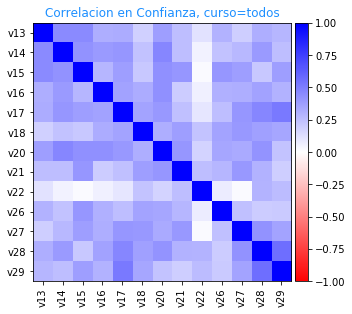

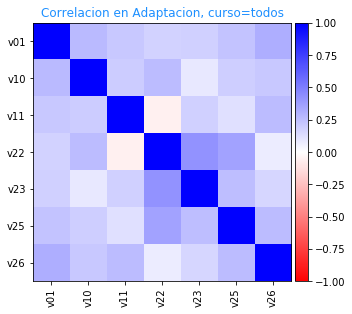

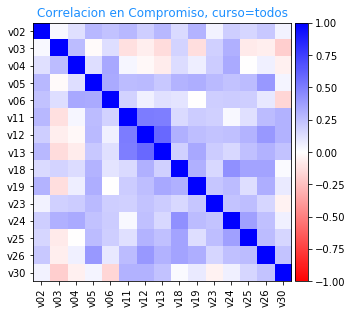

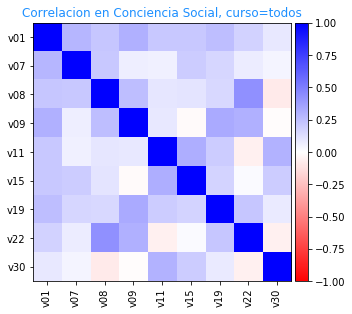

In [42]:
plot_corr_matrix(df_a[m1], 
                 'Correlacion en {0}, curso=todos'.format(equiv['m1']), 
                 'matriz_corr_{0}_cursoTodos.png'.format(equiv['m1']),)
plot_corr_matrix(df_a[m2], 
                 'Correlacion en {0}, curso=todos'.format(equiv['m2']), 
                 'matriz_corr_{0}_cursoTodos.png'.format(equiv['m2']),)
plot_corr_matrix(df_a[m3], 
                 'Correlacion en {0}, curso=todos'.format(equiv['m3']), 
                 'matriz_corr_{0}_cursoTodos.png'.format(equiv['m3']),)
plot_corr_matrix(df_a[m4], 
                 'Correlacion en {0}, curso=todos'.format(equiv['m4']), 
                 'matriz_corr_{0}_cursoTodos.png'.format(equiv['m4']),)

Correlation for macro-variable 1, for the different years


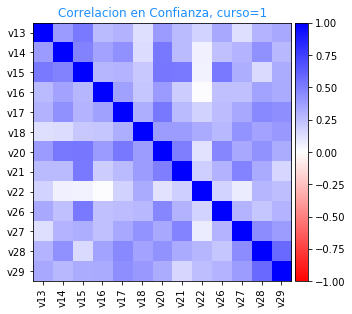

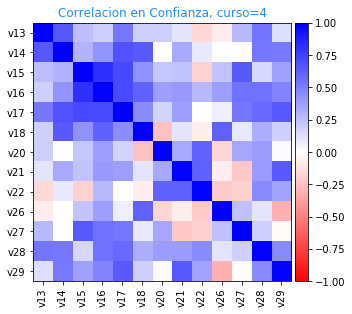

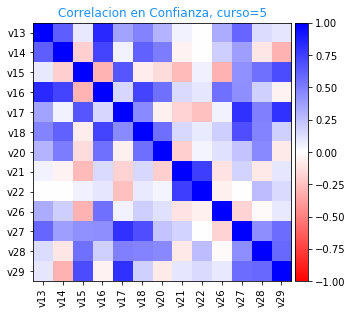

In [43]:
plot_corr_matrix(y1[m1], 
                 'Correlacion en {0}, curso=1'.format(equiv['m1']), 
                 'matriz_corr_{0}_curso1.png'.format(equiv['m1']),)
plot_corr_matrix(y4[m1], 
                 'Correlacion en {0}, curso=4'.format(equiv['m1']), 
                 'matriz_corr_{0}_curso4.png'.format(equiv['m1']),)
plot_corr_matrix(y5[m1], 
                 'Correlacion en {0}, curso=5'.format(equiv['m1']), 
                 'matriz_corr_{0}_curso5.png'.format(equiv['m1']),)

Correlation for macro-variable 2, for the different years

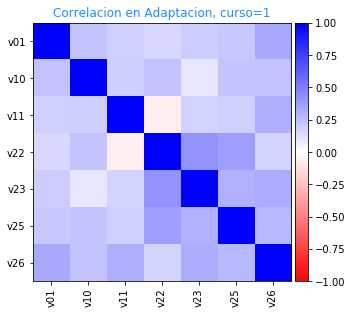

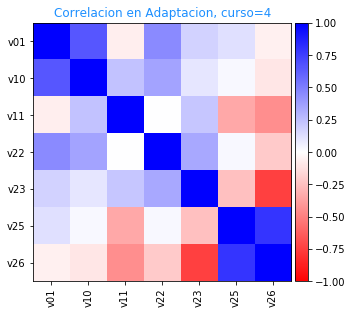

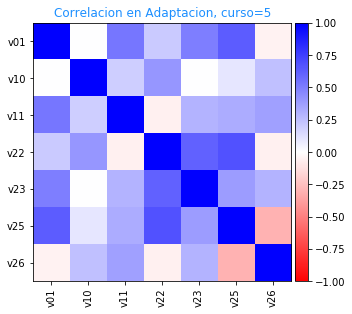

In [44]:
plot_corr_matrix(y1[m2], 
                 'Correlacion en {0}, curso=1'.format(equiv['m2']), 
                 'matriz_corr_{0}_curso1.png'.format(equiv['m2']),)
plot_corr_matrix(y4[m2], 
                 'Correlacion en {0}, curso=4'.format(equiv['m2']), 
                 'matriz_corr_{0}_curso4.png'.format(equiv['m2']),)
plot_corr_matrix(y5[m2], 
                 'Correlacion en {0}, curso=5'.format(equiv['m2']), 
                 'matriz_corr_{0}_curso5.png'.format(equiv['m2']),)

Correlation for macro-variable 3, for the different years

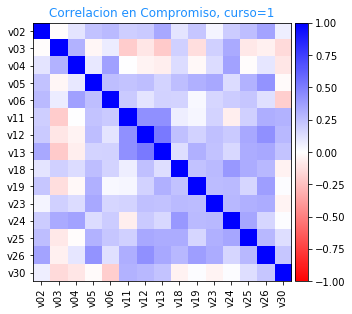

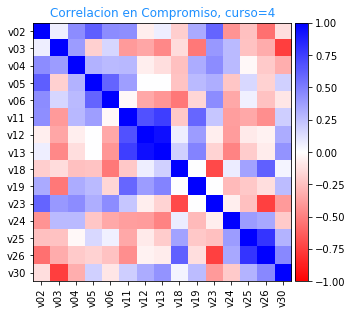

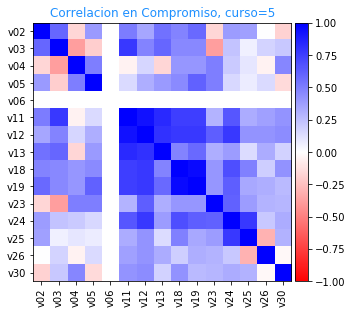

In [45]:
plot_corr_matrix(y1[m3], 
                 'Correlacion en {0}, curso=1'.format(equiv['m3']), 
                 'matriz_corr_{0}_curso1.png'.format(equiv['m3']),)
plot_corr_matrix(y4[m3], 
                 'Correlacion en {0}, curso=4'.format(equiv['m3']), 
                 'matriz_corr_{0}_curso4.png'.format(equiv['m3']),)
plot_corr_matrix(y5[m3], 
                 'Correlacion en {0}, curso=5'.format(equiv['m3']), 
                 'matriz_corr_{0}_curso5.png'.format(equiv['m3']),)

Correlation for macro-variable 4, for the different years

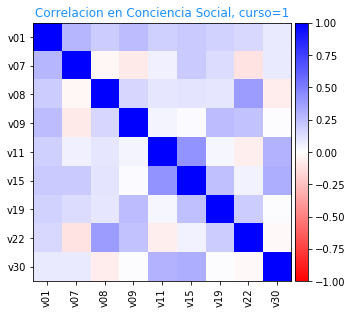

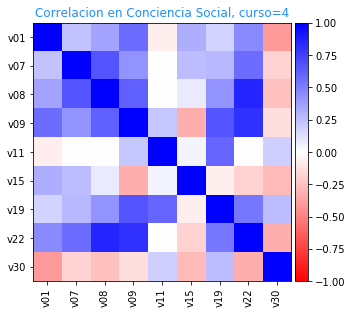

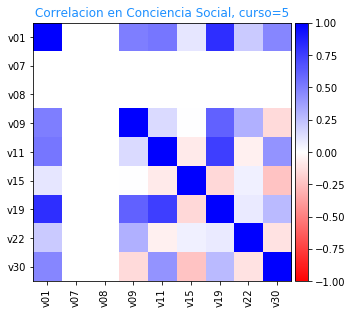

In [46]:
plot_corr_matrix(y1[m4], 
                 'Correlacion en {0}, curso=1'.format(equiv['m4']), 
                 'matriz_corr_{0}_curso1.png'.format(equiv['m4']),)
plot_corr_matrix(y4[m4], 
                 'Correlacion en {0}, curso=4'.format(equiv['m4']), 
                 'matriz_corr_{0}_curso4.png'.format(equiv['m4']),)
plot_corr_matrix(y5[m4], 
                 'Correlacion en {0}, curso=5'.format(equiv['m4']), 
                 'matriz_corr_{0}_curso5.png'.format(equiv['m4']),)

## Subset of variables

### Comments:
Should be related: "compromiso" and "conciencia social". Also "confianza" and "adaptacion"

Should evolve over time: "confianza", "adaptacion" and "conciencia social"

Subset:
* Confianza (m1): v14, v17
* Adpatacion (m2): v10, v23
* Compromiso (m3): v05, v12
* Conciencia (m4): v11, v19

Confianza (m1) / Adaptacion (m2) / Compromiso (m3) / Conciencia social (m4)


**To do:**

1) histograms -- not

2) Anderson-Darling

3) 2D histograms / clustering

4) time-evolution -- not

## Anderson-Darling test for some variables

Analysis of the pairs

Output: A2, critical (25%, 10%, 5%, 2.5%, 1%), p-value

In [66]:
sub_m1_all = stats.anderson_ksamp([df_a[c].values for c in ['v14', 'v17']])
sub_m1_y1 = stats.anderson_ksamp([y1[c].values for c in ['v14', 'v17']])
sub_m1_y4 = stats.anderson_ksamp([y4[c].values for c in ['v14', 'v17']])
sub_m1_y5 = stats.anderson_ksamp([y5[c].values for c in ['v14', 'v17']])

/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [70]:
sub_m1_all, sub_m1_y1, sub_m1_y4, sub_m1_y5

(Anderson_ksampResult(statistic=9.039859600454465, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.0002267398939273295),
 Anderson_ksampResult(statistic=8.304505517290139, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.00035287928988190625),
 Anderson_ksampResult(statistic=0.19348206620665165, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.28493323108432483),
 Anderson_ksampResult(statistic=0.47642774746087674, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.21330381021709174))

In [67]:
sub_m2_all = stats.anderson_ksamp([df_a[c].values for c in ['v10', 'v23']])
sub_m2_y1 = stats.anderson_ksamp([y1[c].values for c in ['v10', 'v23']])
sub_m2_y4 = stats.anderson_ksamp([y4[c].values for c in ['v10', 'v23']])
sub_m2_y5 = stats.anderson_ksamp([y5[c].values for c in ['v10', 'v23']])

/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [71]:
sub_m2_all, sub_m2_y1, sub_m2_y4, sub_m2_y5

(Anderson_ksampResult(statistic=-1.3021604854987816, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=1.4081472631912921),
 Anderson_ksampResult(statistic=-1.001545259118286, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=1.01211717108906),
 Anderson_ksampResult(statistic=-0.5918120416778623, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.6500593281369127),
 Anderson_ksampResult(statistic=-1.4503021135941399, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=1.6597920949586282))

In [68]:
sub_m3_all = stats.anderson_ksamp([df_a[c].values for c in ['v05', 'v12']])
sub_m3_y1 = stats.anderson_ksamp([y1[c].values for c in ['v05', 'v12']])
sub_m3_y4 = stats.anderson_ksamp([y4[c].values for c in ['v05', 'v12']])
sub_m3_y5 = stats.anderson_ksamp([y5[c].values for c in ['v05', 'v12']])

/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [72]:
sub_m3_all, sub_m3_y1, sub_m3_y4, sub_m3_y5

(Anderson_ksampResult(statistic=6.641272450680098, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.0010615553279565788),
 Anderson_ksampResult(statistic=6.451119968225284, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.0012147831526559973),
 Anderson_ksampResult(statistic=-0.8305514073324832, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.840502645722428),
 Anderson_ksampResult(statistic=4.028616982205944, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.007943678016152877))

In [69]:
sub_m4_all = stats.anderson_ksamp([df_a[c].values for c in ['v11', 'v19']])
sub_m4_y1 = stats.anderson_ksamp([y1[c].values for c in ['v11', 'v19']])
sub_m4_y4 = stats.anderson_ksamp([y4[c].values for c in ['v11', 'v19']])
sub_m4_y5 = stats.anderson_ksamp([y5[c].values for c in ['v11', 'v19']])

/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
/Users/fco/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [73]:
sub_m4_all, sub_m4_y1, sub_m4_y4, sub_m4_y5

(Anderson_ksampResult(statistic=9.48311365150393, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.00017598466484337912),
 Anderson_ksampResult(statistic=7.411466113125806, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.0006264587155071203),
 Anderson_ksampResult(statistic=0.8267064468135105, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.1498881115427157),
 Anderson_ksampResult(statistic=-1.0241639616985778, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=1.0374152536513899))

## 2D histograms between the variables showing higher AD test

(array([[1., 0., 0., 0., 0., 3., 0., 0., 0., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <matplotlib.image.AxesImage at 0x1a25192f60>)

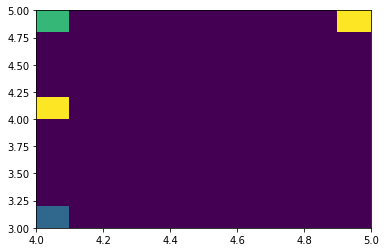

In [79]:
fig, ax = plt.subplots()
ax.hist2d(y5['v14'], y5['v19'])